In [1]:
import numpy as np
import pandas as pd
from random import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [45]:
import plotly.express as px

In [107]:
SAMPLES = 5000

In [108]:
# read coordinates and translate to cartesian
coords = pd.read_csv("cache/tiles.csv", names=["lat", "long"])
rx = (np.cos(np.deg2rad(coords["lat"])) * np.cos(np.deg2rad(coords["long"]))).values
ry = (np.cos(np.deg2rad(coords["lat"])) * np.sin(np.deg2rad(coords["long"]))).values
rz = (np.sin(np.deg2rad(coords["lat"]))).values
# define random color for each reference point
reference_colors = [(random(),random(),random()) for x in range(len(rx))]

In [109]:
def fibonacci_sphere(samples):
    """ sample evenly spaced points on sphere """
    points = []
    phi = np.pi * (3. - np.sqrt(5.))

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2
        radius = np.sqrt(1 - y * y)
        theta = phi * i
        x = np.cos(theta) * radius
        z = np.sin(theta) * radius
        points.append([x, y, z])
    return points

In [110]:
# sample evenly spaced points on sphere
xi,yi,zi = list(zip(*fibonacci_sphere(samples=SAMPLES)))

In [111]:
# determine their color by adapting color of closest reference point
colors = []
for i in range(len(xi)):
    point = np.array([xi[i], yi[i], zi[i]])
    distances = [np.linalg.norm(point-np.array([x,y,z])) for x,y,z in zip(rx,ry,rz)]
    colors.append(reference_colors[np.argmin(distances)])


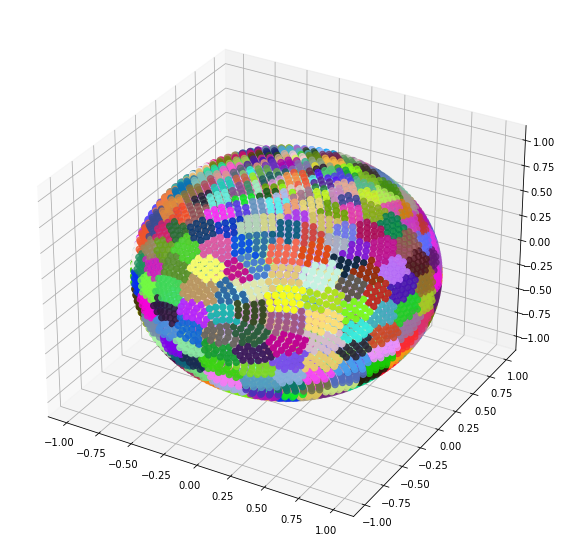

In [80]:
# plot
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.scatter(xi, yi, zi, s=40, color=colors)

In [112]:
def xyz_to_latlon (x,y,z):
    """Convert cartesian to angular lat/lon coordiantes"""
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arcsin(z/r) 
    phi = np.arctan2(y,x)
    lat = np.degrees(theta)
    lon = np.degrees(phi)
    return [lat,lon]

In [113]:
lat, lon = xyz_to_latlon(*np.array([xi,yi,zi]))

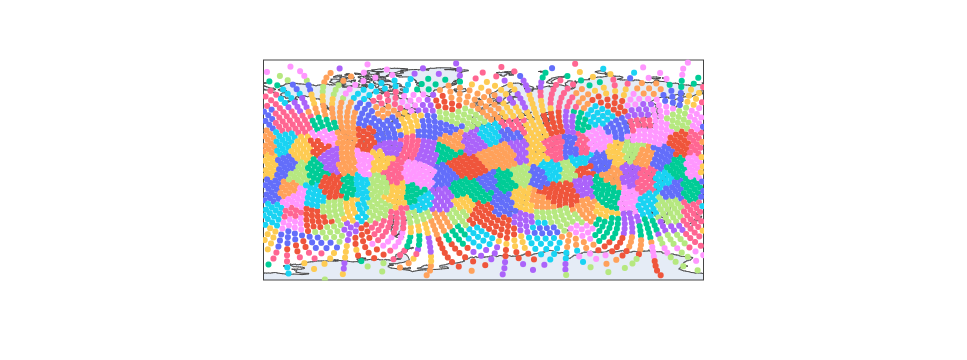

In [106]:
fig = px.scatter_geo(lat=lat,lon=lon, color=colors)
fig.update_layout(showlegend=False)

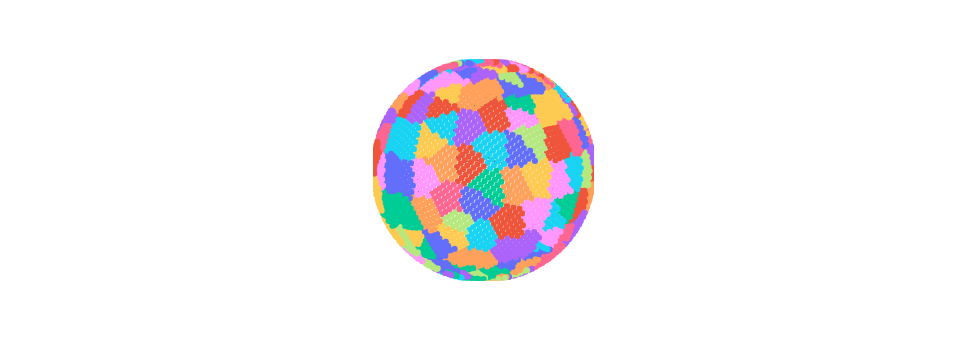

In [114]:
fig = px.scatter_geo(lat=lat,lon=lon, color=colors, projection="orthographic")
fig.update_layout(showlegend=False)